In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### EDA

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Đặc điểm vật lý của nhà:

# bedrooms: Số phòng ngủ
# bathrooms: Số phòng tắm (có thể là số thập phân, ví dụ: 2.5 = 2 phòng tắm đầy đủ + 1 phòng vệ sinh)
# sqft_living: Diện tích không gian sống bên trong (tính bằng feet vuông)
# sqft_lot: Diện tích lô đất (tính bằng feet vuông)
# floors: Số tầng của ngôi nhà
# sqft_above: Diện tích phần trên mặt đất (không bao gồm tầng hầm)
# sqft_basement: Diện tích tầng hầm

# Chất lượng và tình trạng:

# waterfront: Nhà có view/giáp mặt nước không (0 = không, 1 = có)
# view: Chất lượng tầm nhìn từ nhà (thang điểm từ 0-4)
# condition: Tình trạng tổng thể của ngôi nhà (thang điểm từ 1-5)
# grade: Mức độ xây dựng và thiết kế (thang điểm từ 1-13, dựa trên chất lượng vật liệu và thiết kế)

# Thông tin thời gian:

# yr_built: Năm xây dựng ngôi nhà
# yr_renovated: Năm cải tạo (0 nếu chưa từng được cải tạo)

# Vị trí địa lý:

# zipcode: Mã bưu chính
# lat: Vĩ độ
# long: Kinh độ

# Thông tin khu vực lân cận:

# sqft_living15: Diện tích trung bình không gian sống của 15 căn nhà gần nhất
# sqft_lot15: Diện tích trung bình lô đất của 15 căn nhà gần nhất

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.duplicated().sum()
df.isnull().sum()
# -> không có missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

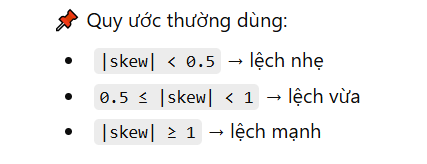

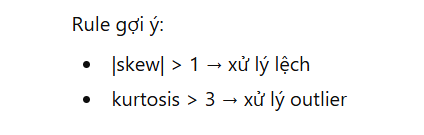

Skewness = 4.024069144684714 -> Cần log transform
Kurtosis = 34.585540431942434 -> Có nhiều oulier


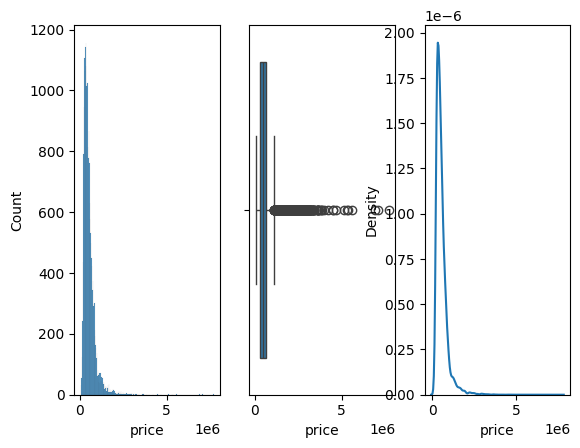

<Figure size 1200x1000 with 0 Axes>

In [15]:
# trực quan biến mục tiêu
fig, axes = plt.subplots(nrows=1, ncols=3)

plt.figure(figsize=(12, 10))
sns.histplot(df, x="price", ax=axes[0])
sns.boxplot(df, x="price", ax=axes[1])
sns.kdeplot(df, x="price", ax=axes[2])

# quan sát bằng biểu đồ:
# -> phân phối lệch phải mạnh, mean >> std -> log transform target
# -> nhiều outlier -> cần xử lý? , tree models based tốt hơn?

# dùng pandas
if df["price"].skew() > 1:
    print(f'Skewness = {df["price"].skew()} -> Cần log transform')

if df["price"].kurtosis() > 3:
    print(f'Kurtosis = {df["price"].kurtosis()} -> Có nhiều oulier')

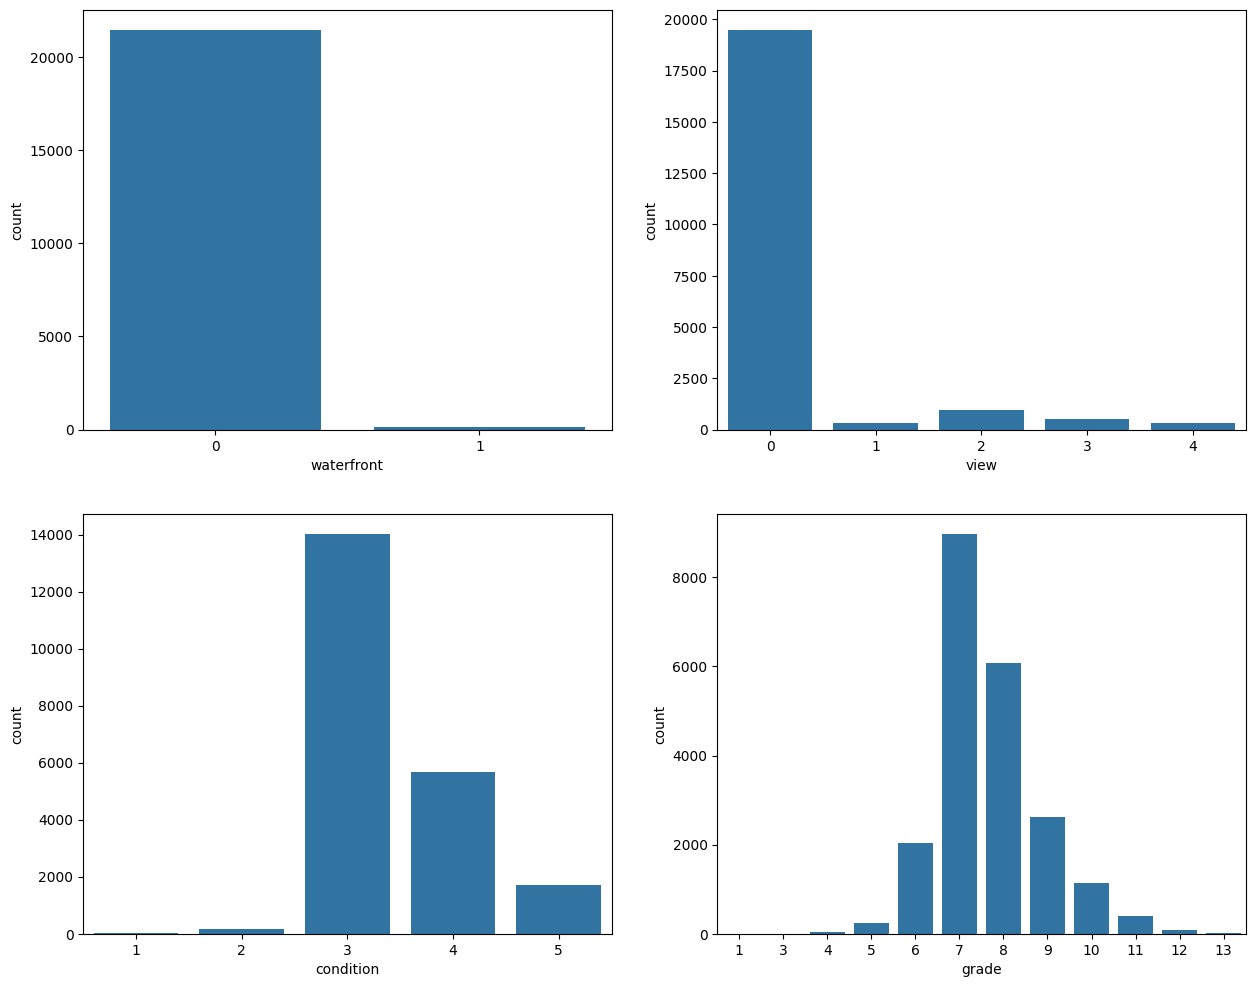

In [ ]:
# trực quan đơn biến

# biến categorical: 4 biến
categories_columns = ["waterfront", "view", "condition", "grade"]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categories_columns):
    sns.countplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# mục đích: quyết định cách encoding, phát hiện imbalanced, cần grouping ?

,Name column,Skewness,Kurtosis
0,sqft_lot,13.060019,285.077820
1,sqft_lot15,9.506743,150.763110
2,bedrooms,1.974300,49.063653
3,sqft_basement,1.577965,2.715574
4,sqft_living,1.471555,5.243093
5,sqft_above,1.446664,3.402304
6,sqft_living15,1.108181,1.597096
7,floors,0.616177,-0.484723
8,bathrooms,0.511108,1.279902
9,yr_built,-0.469805,-0.657408


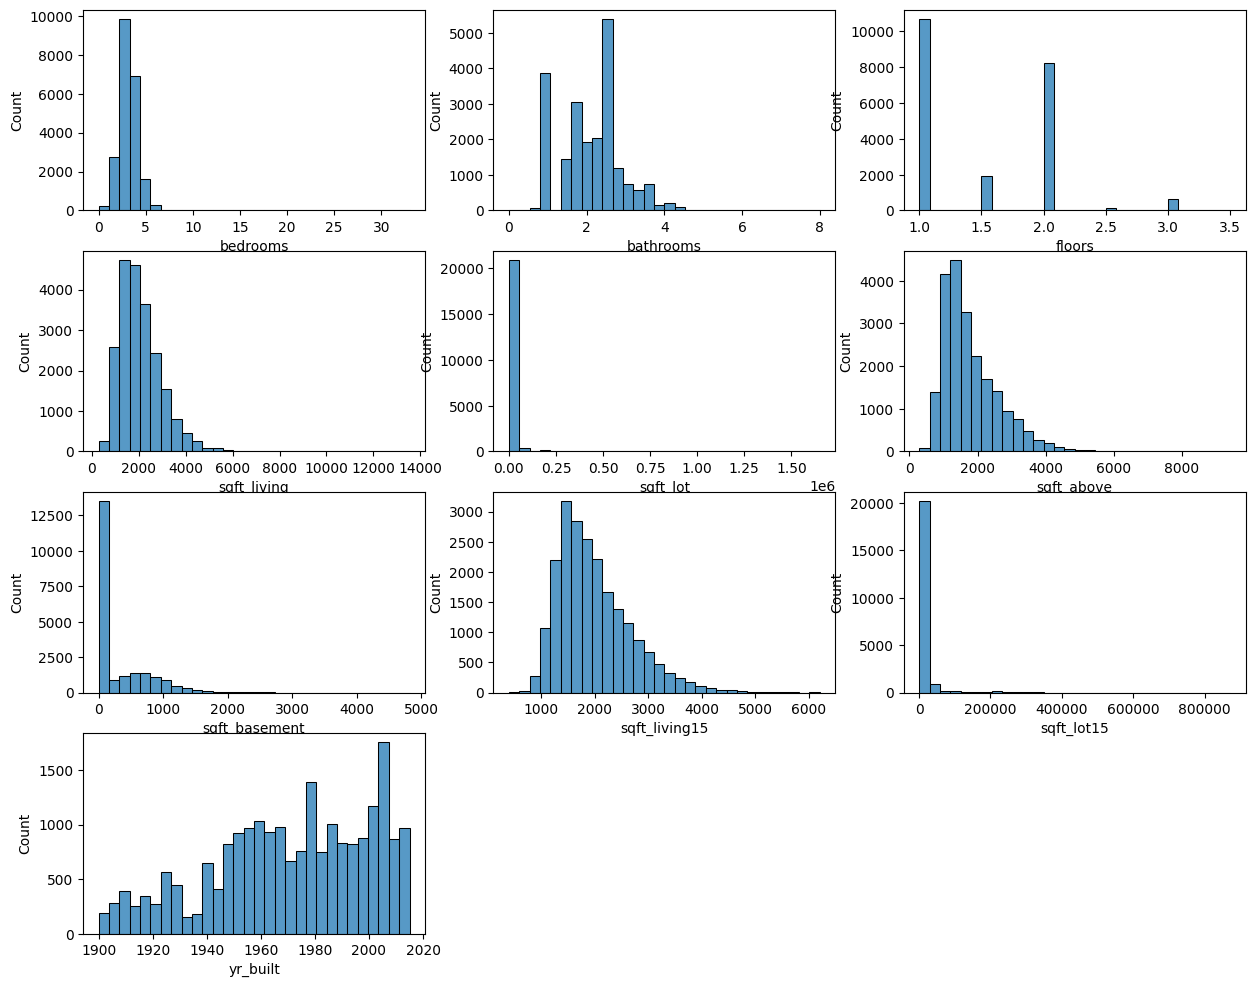

In [ ]:
# biến numerical: 10 biến
numerical_columns = ["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yr_built"]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, ax=axes[i], bins=30)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

skewness= {}
kurtosis= {}
for col in numerical_columns:
    skewness[col] = float(df[col].skew())
    kurtosis[col] = float(df[col].kurtosis())

skew_sorted = sorted(skewness.items(), key=lambda x : x[1], reverse=True)
kurtosis_sorted = sorted(kurtosis.items(), key=lambda x : x[1], reverse=True)
dfs = pd.DataFrame(skew_sorted, columns=["Name column", "Skewness"])
dfk = pd.DataFrame(kurtosis_sorted, columns=["Name column", "Kurtosis"])

dfsk = dfs.merge(dfk, on="Name column", how="left")
dfsk

# mục đích: xử lý oulier, lệch chuẩn, scaling ?

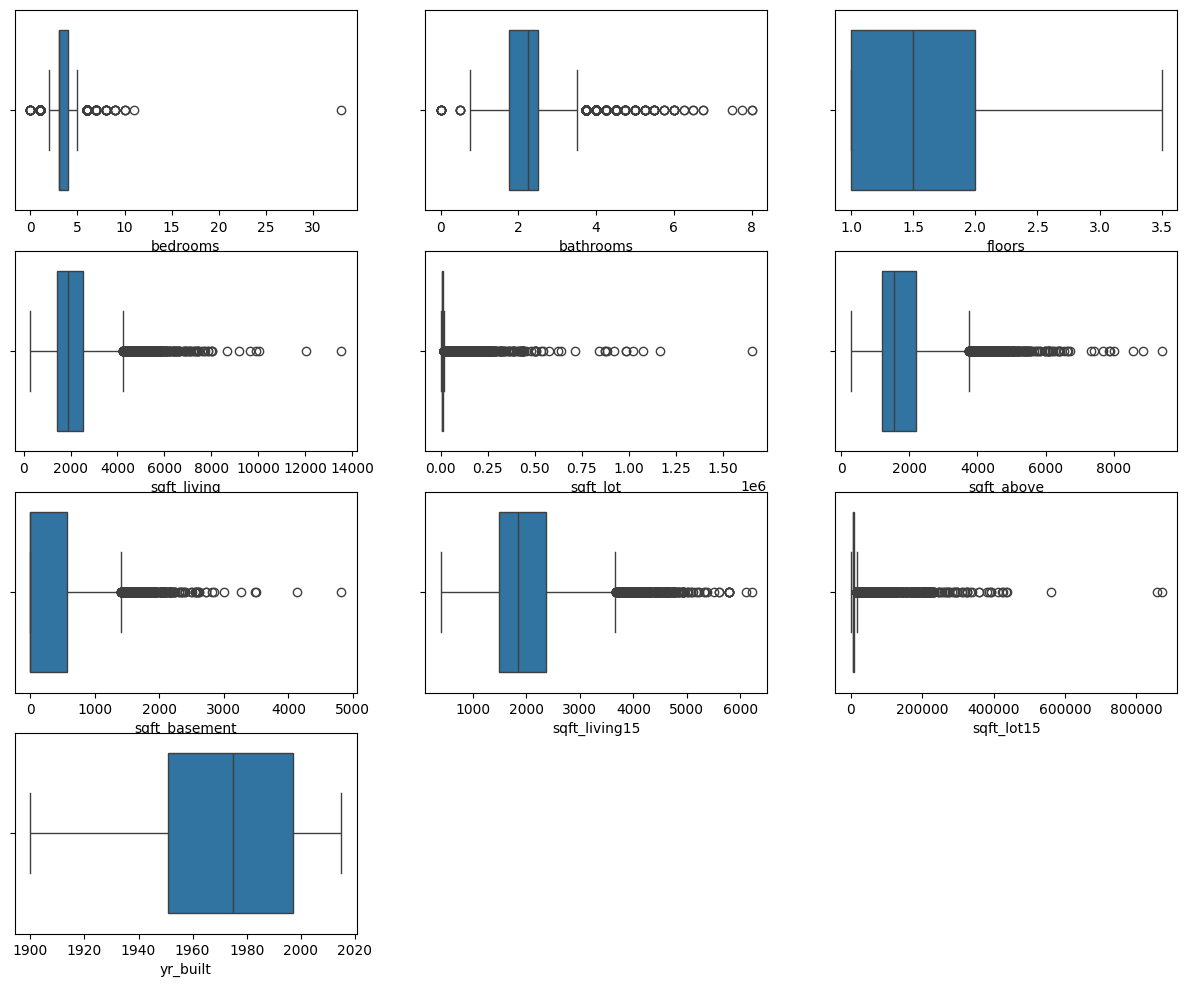

In [26]:
numerical_columns = ["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "yr_built"]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

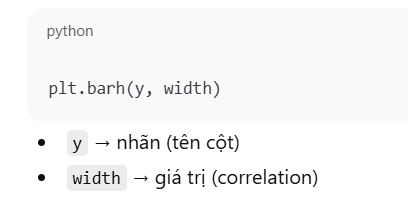

<BarContainer object of 18 artists>

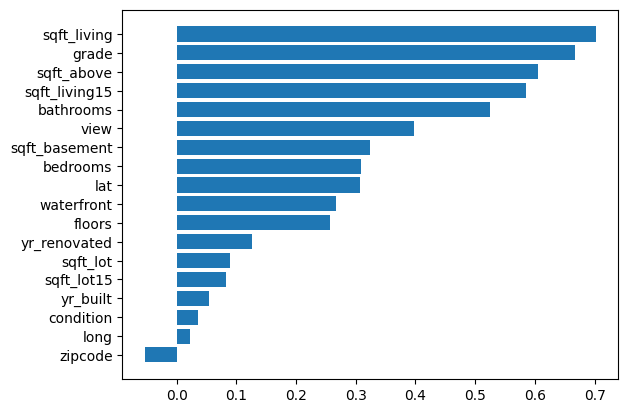

In [ ]:
# trực quan mối quan hệ đa biến

columns = df.columns.drop(['id', 'date'])

corr_with_columns = df[columns].corr()['price'].sort_values().drop('price')
plt.barh(corr_with_columns.index, corr_with_columns.values)


<Axes: xlabel='long', ylabel='lat'>

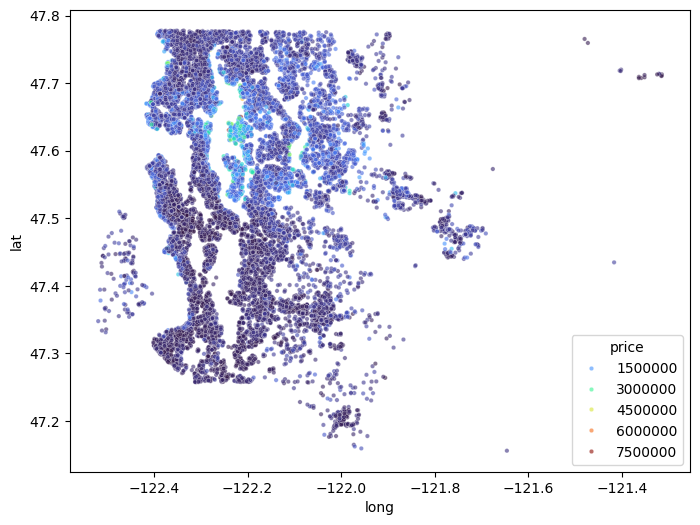

In [ ]:

plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x="long", y="lat", hue="price", 
                palette="turbo", alpha=0.6, s=10)

<Axes: >

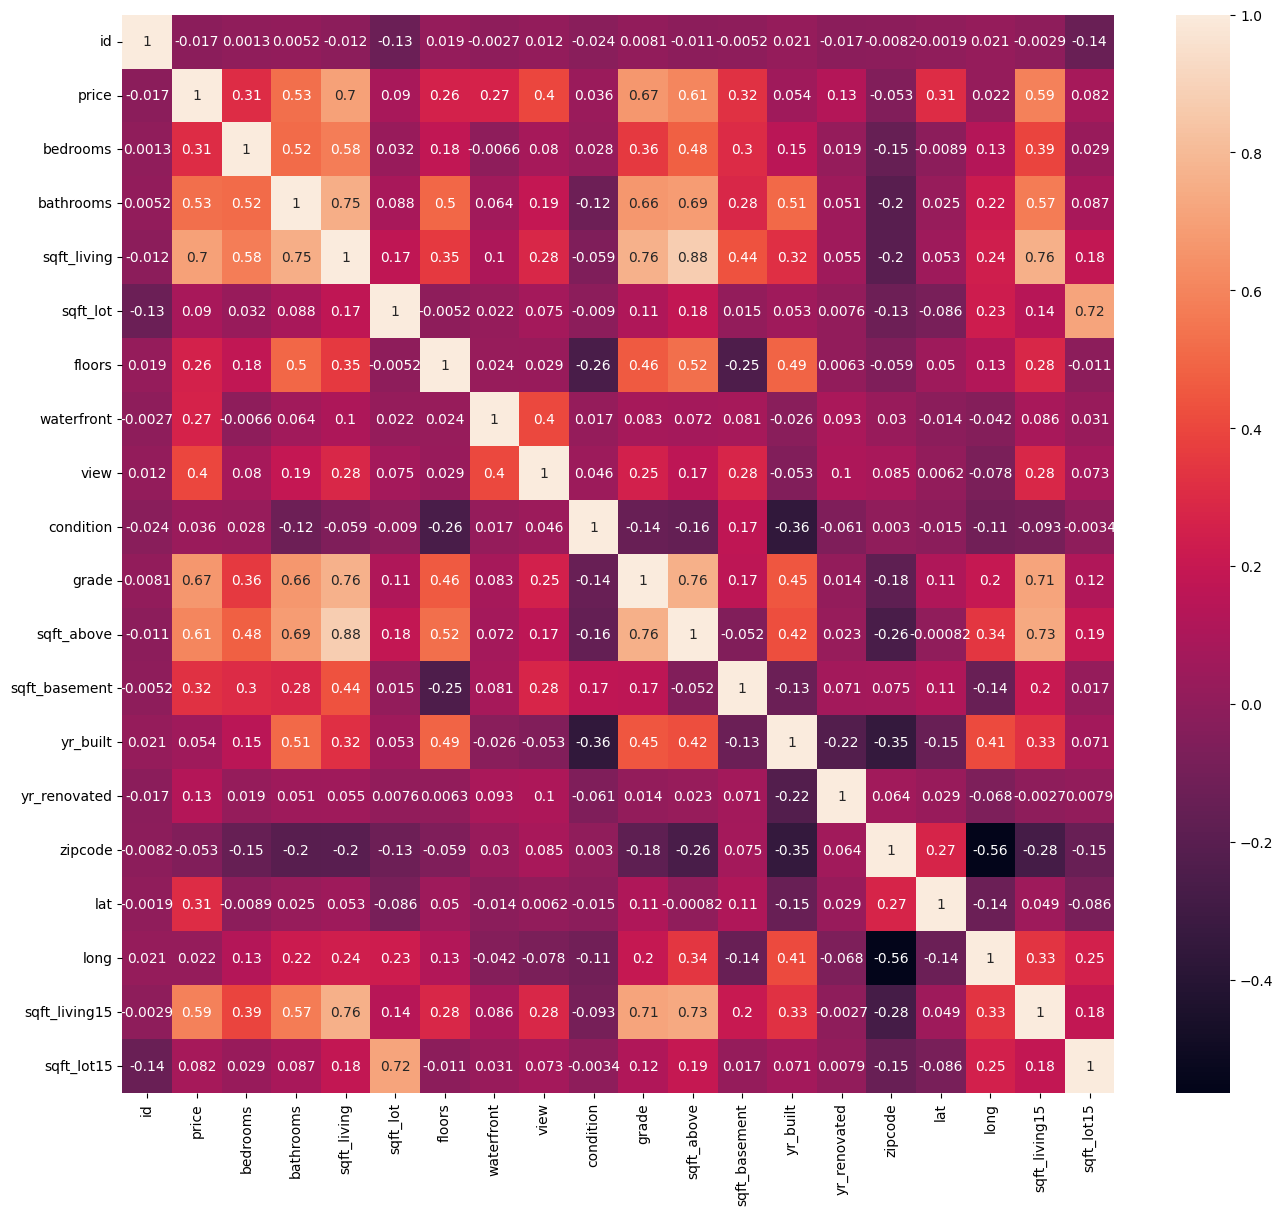

In [61]:
plt.figure(figsize=(16, 14))
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

# -> price có mức độ tương quan cao với các biến: bedrooms, bathrooms, sqlf_living, floors, waterfont, condition, view, sqlf_above, sqlf_basement, lat, sqlf_living15

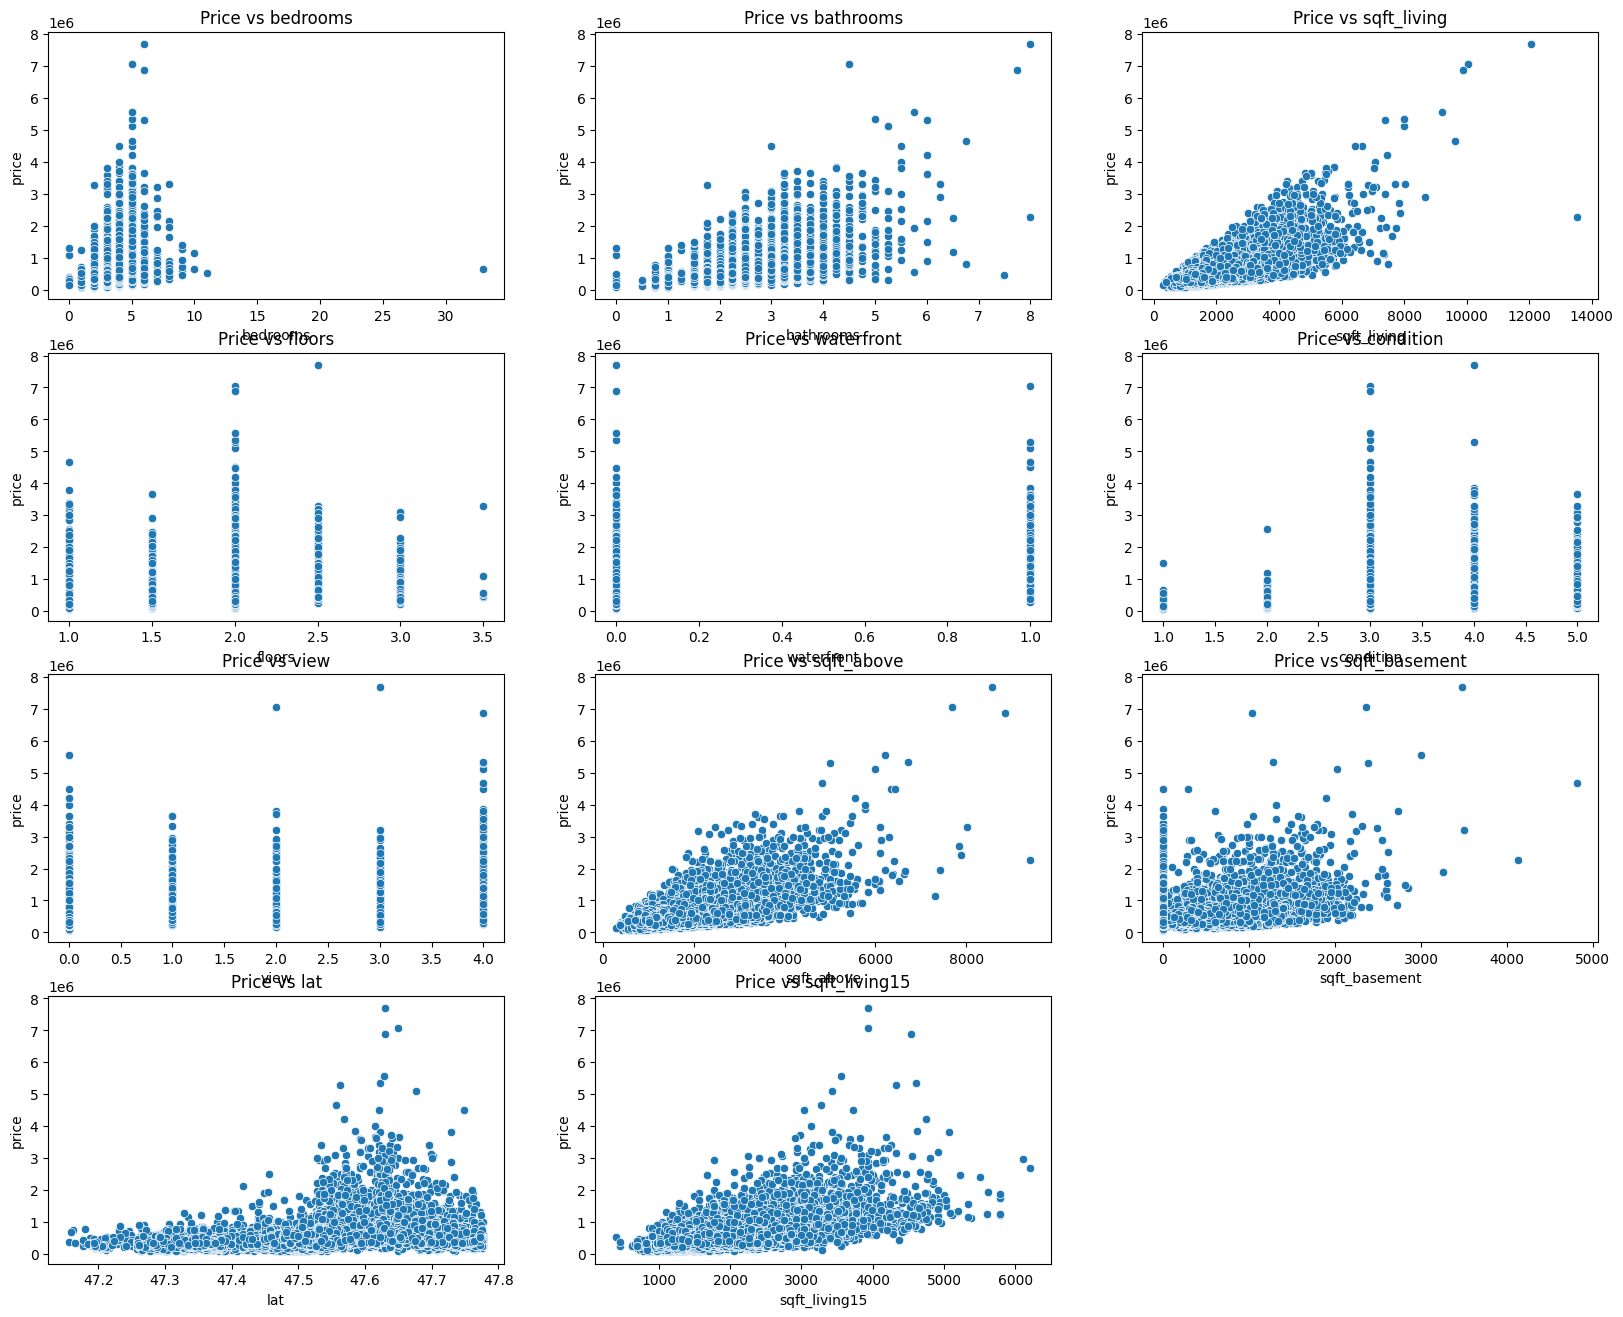

In [ ]:
features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "condition", "view", "sqft_above", "sqft_basement", "lat", "sqft_living15"]
fig, axes = plt.subplots(4, 3, figsize = (20, 16))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.scatterplot(df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"Price vs {col}")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)



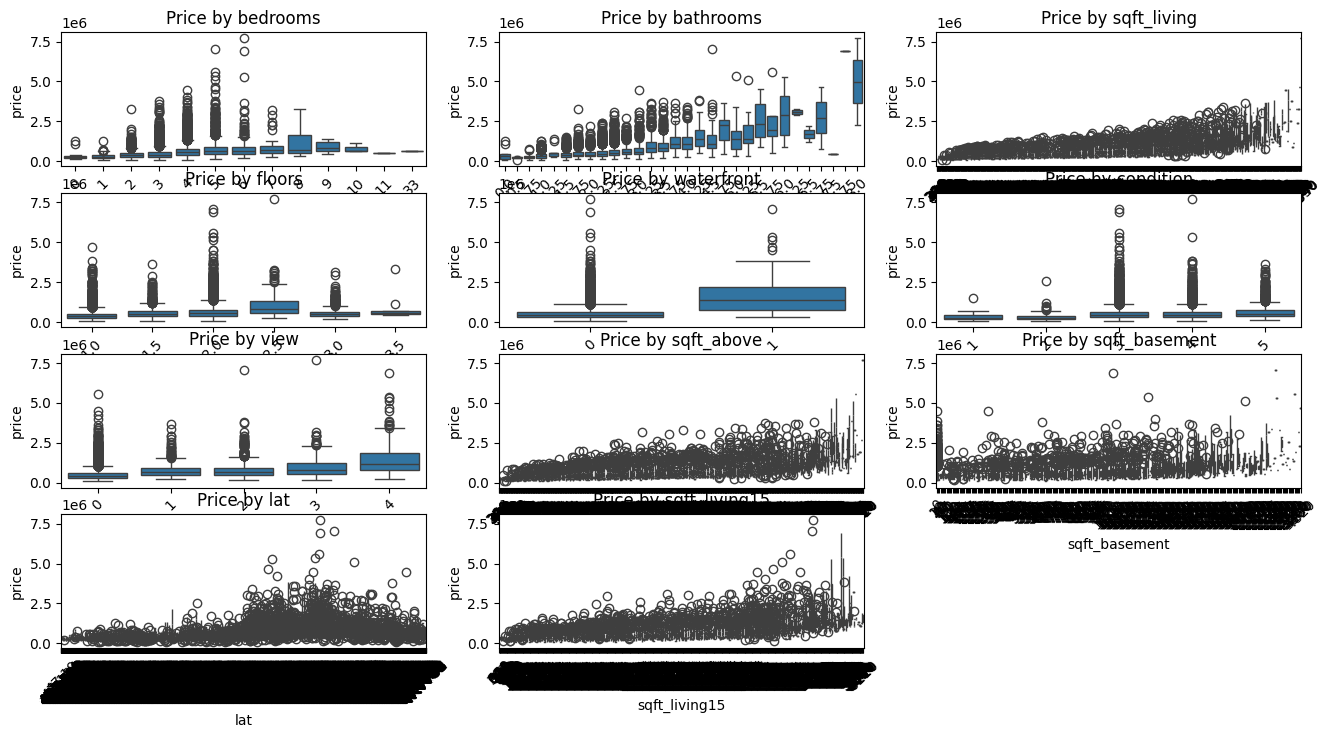

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8))
axes = axes.flatten()

features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "condition", "view", "sqft_above", "sqft_basement", "lat", "sqft_living15"]

for i, col in enumerate(features):
    sns.boxplot(data=df, x=col, y="price", ax=axes[i])
    axes[i].set_title(f"Price by {col}")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor


#### Before processing

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]
print(X.shape, y.shape)

(21613, 20) (21613,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: '20140527T000000'

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# y_pred = model.predict(X_test)

# # Tính các metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)  # Root Mean Squared Error
# r2 = r2_score(y_test, y_pred)

# # In kết quả rõ ràng
# print("Model Evaluation Metrics:")
# print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
# print(f"MSE (Mean Squared Error): ${mse:,.2f}")
# print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
# print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
MAE (Mean Absolute Error): $73,195.03
MSE (Mean Squared Error): $21,499,983,198.07
RMSE (Root Mean Squared Error): $146,628.73
R² Score: 0.8578


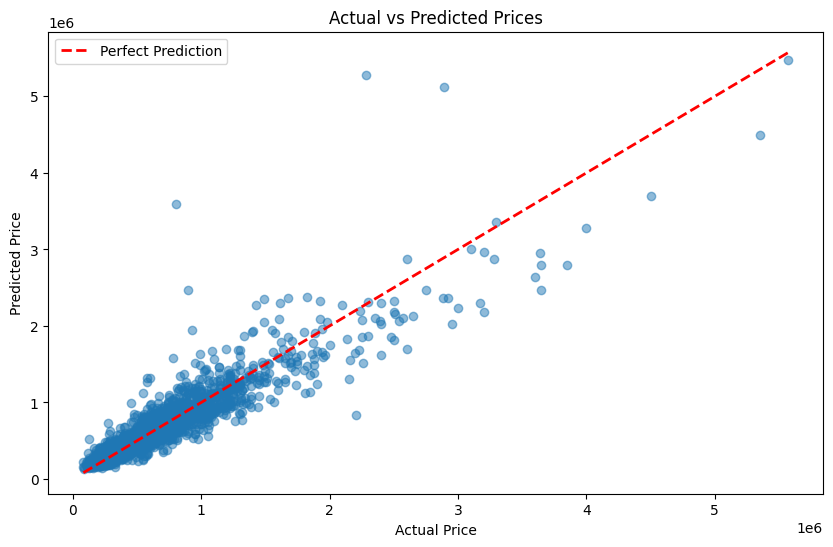

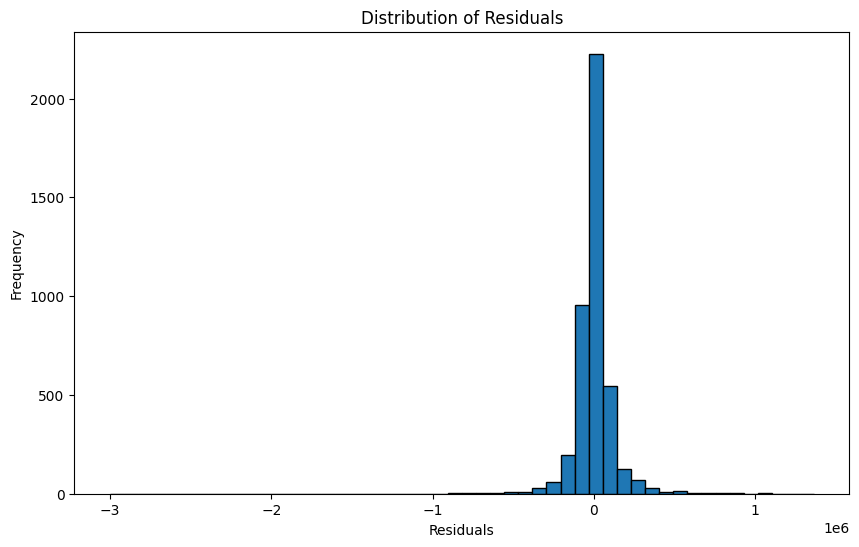

In [ ]:
# So sánh giá thực tế vs dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Phân phối residuals (sai số)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

#### After processing

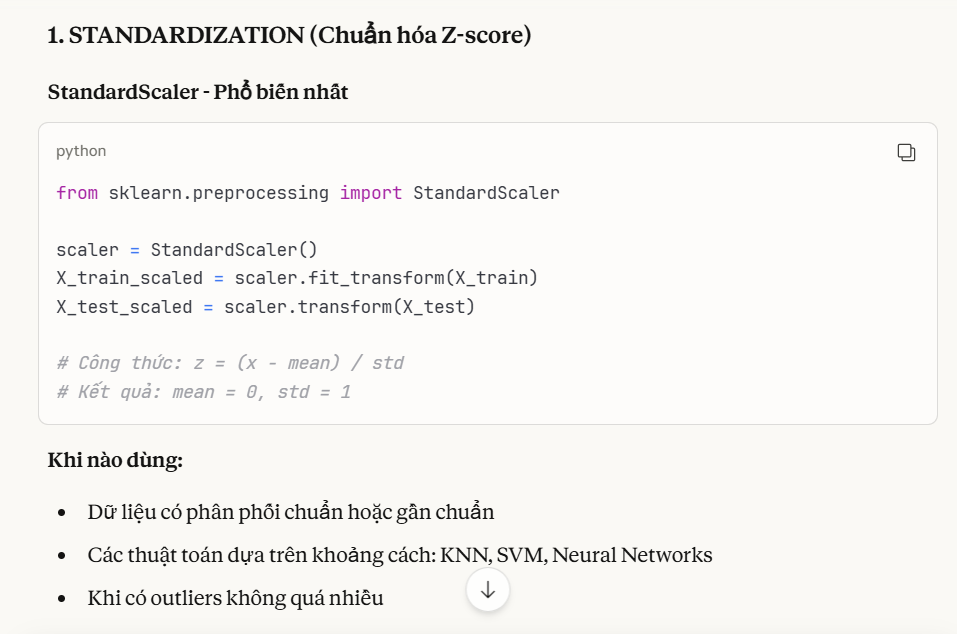
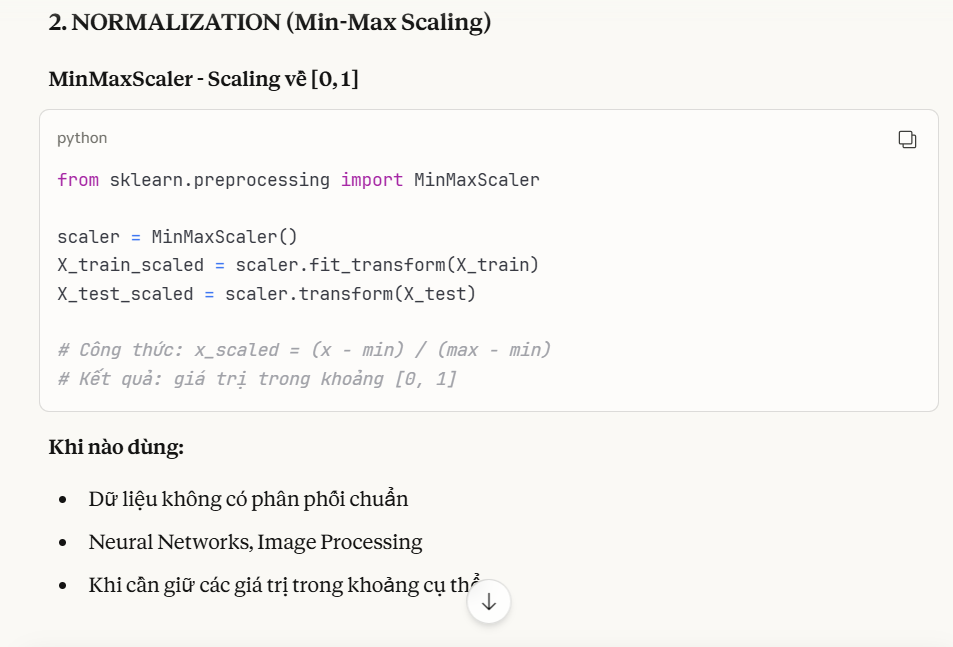
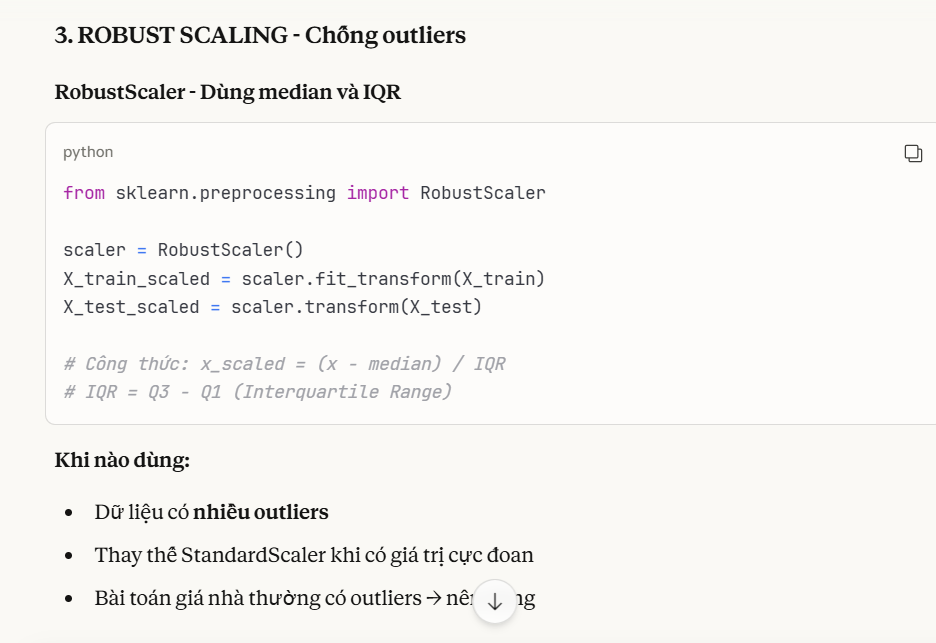

In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,47.7043,-122.209,2090,10454


In [ ]:
num_cat_transformation = ColumnTransformer(
    [
        ("scaling", MinMaxScaler(), [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 15, 16])
    ], 
    remainder="passthrough"
)

In [ ]:
def create_pipeline(algo):
    return Pipeline(
        [
            ('num_cat_transformation', num_cat_transformation),
            ('regression', algo)
        ]
    )

### Model traning

In [ ]:
algorithms = [
    # linear
    LinearRegression(),
    Ridge(),
    Lasso(),
    
    # tree
    ExtraTreeRegressor(),
    DecisionTreeRegressor(),

    # ensemble
    BaggingRegressor(),
    AdaBoostRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),

    # neighbors
    KNeighborsRegressor()

]

In [ ]:
# model_names = []
# CV_MAE = []  # Mean Absolute Error
# CV_RMSE = []  # Root Mean Squared Error
# CV_R2 = []  # R² Score

# for algo in algorithms:
#     pipeline = create_pipeline(algo)
    
#     # Tính MAE (âm vì cross_val_score maximize, MAE minimize)
#     mae_scores = cross_val_score(pipeline, X_train, y_train, 
#                                   cv=5, scoring='neg_mean_absolute_error')
    
#     # Tính RMSE
#     rmse_scores = cross_val_score(pipeline, X_train, y_train, 
#                                    cv=5, scoring='neg_root_mean_squared_error')
    
#     # Tính R²
#     r2_scores = cross_val_score(pipeline, X_train, y_train, 
#                                  cv=5, scoring='r2')
    
#     model_names.append(algo.__class__.__name__)
#     CV_MAE.append(-mae_scores.mean())  # Đảo dấu về dương
#     CV_RMSE.append(-rmse_scores.mean())  # Đảo dấu về dương
#     CV_R2.append(r2_scores.mean())

# results = pd.DataFrame({
#     'Model': model_names,
#     'CV_MAE': CV_MAE,
#     'CV_RMSE': CV_RMSE,
#     'CV_R2': CV_R2
# })


# print(results.sort_values('CV_R2', ascending=False))

d:\relearnPython\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+13, tolerance: 1.728e+11
  model = cd_fast.enet_coordinate_descent(
d:\relearnPython\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+14, tolerance: 1.795e+11
  model = cd_fast.enet_coordinate_descent(
d:\relearnPython\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.062e+13, tolerance: 1.807e

                       Model         CV_MAE        CV_RMSE     CV_R2
4      RandomForestRegressor   69849.554606  126649.629379  0.876880
5  GradientBoostingRegressor   78047.665525  132429.430491  0.865130
3      DecisionTreeRegressor  101028.471400  186219.528119  0.731514
2                      Lasso  125612.496027  199799.790994  0.693817
0           LinearRegression  125612.248711  199799.968105  0.693816
1                      Ridge  125382.032238  199834.031698  0.693730
6        KNeighborsRegressor  126447.743216  250314.182491  0.519116
